# Goodreads Dataset

From Kaggle, the Goodreads dataset contains information about 10,000 books from ratings and reviews to author and tags.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ast import literal_eval
from collections import Counter, defaultdict
import json

In [3]:
goodreads_books = pd.read_csv('goodreads/books.csv')[['book_id','books_count','isbn','authors','original_publication_year','original_title','language_code','average_rating','ratings_count']]
goodreads_books.columns = ['book_id','book_counts','isbn','authors','publication_year','title','language_code','average_rating','ratings_count']

In [4]:
goodreads_booktags = pd.read_csv('goodreads/book_tags.csv').drop(['count'],axis=1)
goodreads_booktags.columns = ['book_id','tag_id']

In [6]:
goodreads_tags = pd.read_csv('goodreads/tags.csv')

In [8]:
booktags = goodreads_booktags.merge(goodreads_tags,on='tag_id',how='outer')

In [127]:
genres = booktags.groupby('tag_name').filter(lambda x: len(x) > 1000)

In [123]:
set(genres.tag_name.values)

{'2014-reads',
 '2015-reads',
 '2016-reads',
 '20th-century',
 '3-stars',
 '4-stars',
 '5-stars',
 'abandoned',
 'action',
 'action-adventure',
 'adult',
 'adult-fiction',
 'adventure',
 'all-time-favorites',
 'american',
 'audible',
 'audio',
 'audio-book',
 'audio-books',
 'audiobook',
 'audiobooks',
 'biography',
 'book-club',
 'bookclub',
 'books',
 'books-i-have',
 'books-i-own',
 'bookshelf',
 'borrowed',
 'british',
 'calibre',
 'chick-lit',
 'childhood',
 'children',
 'children-s',
 'children-s-books',
 'childrens',
 'childrens-books',
 'classic',
 'classics',
 'comedy',
 'coming-of-age',
 'contemporary',
 'contemporary-fiction',
 'contemporary-romance',
 'crime',
 'crime-mystery',
 'currently-reading',
 'default',
 'did-not-finish',
 'didn-t-finish',
 'dnf',
 'drama',
 'e-book',
 'e-books',
 'ebook',
 'ebooks',
 'england',
 'english',
 'family',
 'fantasy',
 'fantasy-sci-fi',
 'fantasy-scifi',
 'favorite',
 'favorite-authors',
 'favorite-books',
 'favorite-series',
 'favorites

In [165]:
genres[genres['tag_name'] == 'nonfiction']

,book_id,tag_id,tag_name
481283,21,21773,nonfiction
481284,24,21773,nonfiction
481285,25,21773,nonfiction
481286,26,21773,nonfiction
481287,27,21773,nonfiction
481288,28,21773,nonfiction
481289,29,21773,nonfiction
481290,36,21773,nonfiction
481291,98,21773,nonfiction
481292,119,21773,nonfiction


In [125]:
genres = pd.DataFrame(genres.groupby('book_id')['tag_name'].apply(list)).reset_index()

# Making a list of books that have cinematic adaptations

In [14]:
with open('booksmovies_list.txt',encoding="utf8") as f:
    booksmovieslist = f.read().splitlines()

In [80]:
morelist = ['The Hunger Games','Twilight',"Harry Potter and the Philosopher's Stone",
           'Divergent','The Last Song','Catching Fire','Mockingjay','The Da Vinci Code',
           'Gone Girl','A Game of Thrones','Fahrenheit 451',"My Sister's Keeper","Ender's Game",
           'The Perks of Being a Wallflower','Fifty Shades Darker','Me Before You','The Sisterhood of the Traveling Pants',
           "One Flew Over the Cuckoo's Nest",'The Martian','World War Z: An Oral History of the Zombie War',
           'PS, I Love You','The Godfather','The Green Mile','Gulliver’s Travels','A Separate Peace',
           'The Exorcist','Jaws','Harry Potter and the Order of the Phoenix','Harry Potter and the Chamber of Secrets',
           'Harry Potter and the Half-Blood Prince','Memoirs of a Geisha','Harry Potter and the Goblet of Fire','Breaking Dawn',
           'The Shining','Harry Potter and the Deathly Hallows','Jurassic Park','Fifty Shades Freed', 'Insurgent','Allegiant',
           'Crazy Rich Asians','Miss Peregrine’s Home for Peculiar Children','The Sea of Monsters','The Lightning Thief',
           'The Silence of the Lambs','The Immortal Life of Henrietta Lacks','The Bourne Identity','Big Little Lies',
           "Alice's Adventures in Wonderland",'Carrie','Bridge to Terabithia','The Scorch Trials','Prince Caspian: The Return to Narnia',
           'The Crucible','The 5th Wave','The Green Mile','The Bourne Supremacy','The Devil Wears Prada','The Story of Doctor Dolittle',
           'The Voyage of the Dawn Treader',"A Midsummer Night's Dream",'Inferno','The City of Ember','The Notebook',
           'City of Bones','The Outsiders','The Host','Atonement','Paper Towns','Beautiful Creatures',
           'The Secret Life of Bees','The Girl with the Dragon Tattoo','American Sniper: The Autobiography of the Most Lethal Sniper in U.S. Military History',
           ' The Tale of Despereaux','Pride and Prejudice and Zombies','The Woman in White']

In [81]:
allbooksmovies = booksmovieslist + morelist

In [83]:
all_data = pd.merge(goodreads_books,genres,on='book_id',how='outer')
s = pd.Series(all_data['tag_name'])
all_books = pd.concat([all_data,pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0)],axis=1)
all_books['english'] = all_books.language_code.str.contains('en')
all_books = all_books.fillna(0)
all_books['has_movie'] = all_books['title'].apply(lambda x: 1 if x in allbooksmovies else 0)

In [166]:
data = all_books.drop(['book_id','isbn','authors','title','language_code','tag_name'],axis=1)

In [167]:
data

,book_counts,publication_year,average_rating,ratings_count,2014-reads,2015-reads,2016-reads,20th-century,3-stars,4-stars,...,war,wish-list,women,ya,ya-books,ya-fantasy,ya-fiction,young-adult,young-adult-fiction,has_movie
0,272,2008.0,4.34,4780653,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
1,491,1997.0,4.44,4602479,0,0,0,0,0,0,...,0,0,0,1,0,1,1,1,1,1
2,226,2005.0,3.57,3866839,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
3,487,1960.0,4.25,3198671,0,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,1
4,1356,1925.0,3.89,2683664,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
5,226,2012.0,4.26,2346404,1,0,0,0,0,0,...,0,0,0,1,1,0,1,1,1,1
6,969,1937.0,4.25,2071616,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
7,360,1951.0,3.79,2044241,0,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
8,311,2000.0,3.85,2001311,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,3455,1813.0,4.24,2035490,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [168]:
data['has_audiobook'] = data['audible'] + data['audio'] + data['audio-book'] + data['audio-books'] + data['audiobook'] + data['audiobooks']
data['has_audiobook'] = data['has_audiobook'].apply(lambda x: 1 if x > 0 else 0)

data['young_adult'] = data['ya'] + data['ya-books'] + data['ya-fiction'] + data['ya-fantasy'] + data['young-adult'] + data['young-adult-fiction']
data['young_adult'] = data['young_adult'].apply(lambda x: 1 if x > 0 else 0)

data['childrens_fiction'] = data['childhood'] + data['children'] + data['children-s'] + data['children-s-books'] + data['childrens'] + data['childrens-books'] + data['kids'] + data['kids-books']
data['childrens_fiction'] = data['childrens_fiction'].apply(lambda x: 1 if x > 0 else 0)

data['has_ebook'] = data['e-book'] + data['e-books'] + data['ebook'] + data['ebooks'] + data['kindle'] + data['kindle-books'] + data['nook']
data['has_ebook'] = data['has_ebook'].apply(lambda x: 1 if x > 0 else 0)

data['science_fiction'] = data['sci-fi'] + data['sci-fi-fantasy'] + data['science'] + data['science-fiction'] + data['science-fiction-fantasy'] + data['scifi'] + data['scifi-fantasy']
data['science_fiction'] = data['science_fiction'].apply(lambda x: 1 if x > 0 else 0)

data['is_classic'] = data['classic'] + data['classics']
data['is_classic'] = data['is_classic'].apply(lambda x: 1 if x > 0 else 0)

data['fantasy_fiction'] = data['fantasy'] + data['fantasy-sci-fi'] + data['fantasy-scifi']
data['fantasy_fiction'] = data['fantasy_fiction'].apply(lambda x: 1 if x > 0 else 0)

data['mystery_fiction'] = data['mysteries'] + data['mystery'] + data['mystery-crime'] + data['mystery-suspense'] + data['mystery-thriller']
data['mystery_fiction'] = data['mystery_fiction'].apply(lambda x: 1 if x > 0 else 0)

data['historical_fiction'] = data['historical'] + data['historical-fiction'] + data['history']
data['historical_fiction'] = data['historical_fiction'].apply(lambda x: 1 if x > 0 else 0)

data['non_fiction'] = data['non-fiction'] + data['nonfiction']
data['non_fiction'] = data['non_fiction'].apply(lambda x: 1 if x > 0 else 0)

In [170]:
cleaned_data = data[['publication_year','series','biography','science_fiction','romance',
                     'is_classic','comedy', 'fantasy_fiction', 'mystery_fiction','historical_fiction','non_fiction',
                     'young_adult','childrens_fiction','has_audiobook','has_ebook','has_movie']]

In [171]:
pre_2005 = cleaned_data[cleaned_data['publication_year'] < 2005]
post_2005 = cleaned_data[cleaned_data['publication_year'] > 2004]

# Logistic Regression

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [187]:
#x_train, x_test, y_train, y_test = train_test_split(x,y)
x_train = pre_2005.drop(['has_movie','publication_year'],axis=1)
#x_train = pre_2005[['english','publication_year']]
y_train = pre_2005['has_movie']

x_test = post_2005.drop(['has_movie','publication_year'],axis=1)
#x_test = post_2005[['english','publication_year']]
y_test = post_2005['has_movie']

In [188]:
log = LogisticRegression()
log.fit(x_train,y_train)
y_pred = log.predict(x_test)
print(log.score(x_test,y_test))

0.989458747213


0.982769106021


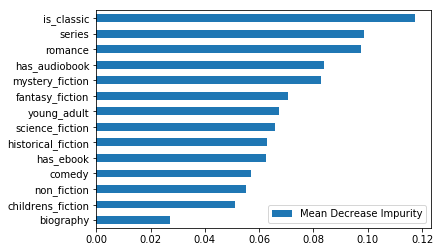

In [189]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print(rfc.score(x_test,y_test))

feat_scores = pd.DataFrame({'Mean Decrease Impurity': rfc.feature_importances_},
                          index=x_train.columns)
feat_scores = feat_scores.sort_values(by='Mean Decrease Impurity')
feat_scores.plot(kind='barh')

0.989458747213


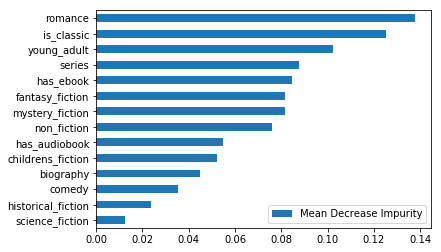

In [190]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_predict = gbc.predict(x_test)
print(gbc.score(x_test,y_test))

feat_scores = pd.DataFrame({'Mean Decrease Impurity': gbc.feature_importances_},
                          index=x_train.columns)
feat_scores = feat_scores.sort_values(by='Mean Decrease Impurity')
feat_scores.plot(kind='barh')

In [95]:
year = range(2001,2013)
percentage = [(56/227),(51/229),(41/222),(51/240),(66/225),(48/424),(42/300),
             (23/204),(31/225),(38/204),(28/201),(42/281)]

Text(0.5,1,'Based on Books Films Percentage')

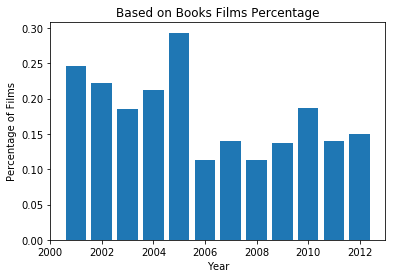

In [97]:
plt.bar(year,percentage)
plt.xlabel('Year')
plt.ylabel('Percentage of Films')
plt.title('Based on Books Films Percentage')

In [104]:
from sklearn.utils import resample
#https://elitedatascience.com/imbalanced-classes

# Up-sample Minority Class

In [176]:
#data = all_books.drop(['book_id','isbn','authors','title','language_code','tag_name'],axis=1)
df_majority = cleaned_data[cleaned_data['has_movie'] == 0]
df_minority = cleaned_data[cleaned_data['has_movie'] == 1]

In [178]:
df_minority_upsampled = resample(df_minority, replace = True, n_samples=9599,random_state=123)
df_upsampled = pd.concat([df_majority,df_minority_upsampled])

In [184]:
y2 = df_upsampled['has_movie']
x2 = df_upsampled.drop(['has_movie','publication_year'],axis=1)

In [185]:
lr2 = LogisticRegression().fit(x2,y2)
pred_y2 = lr2.predict(x2)
print(accuracy_score(y2,pred_y2))

0.776278779039


# Down-sample Majority Class

In [181]:
df_majority_downsampled = resample(df_majority, replace=False,n_samples=401,random_state=123)
df_downsampled = pd.concat([df_majority_downsampled,df_minority])

In [186]:
y3 = df_downsampled['has_movie']
x3 = df_downsampled.drop(['has_movie','publication_year'],axis=1)

l3 = LogisticRegression().fit(x3,y3)
pred_y3 = l3.predict(x3)
print(accuracy_score(y3,pred_y3))

0.788029925187
